In [ ]:
%pylab inline
import numpy as np
from sklearn import preprocessing
from keras.datasets import mnist
from keras.utils import np_utils
np.set_printoptions(suppress=True)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
def preproc(X_train, y_train):
    X = X_train
    X = X.reshape(X.shape[0], X.shape[1] * X.shape[2]).astype("float32")
    #X = X/255
    X = preprocessing.scale(X)
    Y = np_utils.to_categorical(y_train, 10)
    return X, Y

X, Y = preproc(X_train, y_train)
Xt, Yt = preproc(X_test, y_test)

imshow(X[5].reshape((sqrt(X[1].shape),sqrt(X[1].shape))))

In [204]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop

# uniform init
np.random.seed(1337)

# 208896 params
model = Sequential()
model.add(Dense(784, 256))
model.add(Activation('tanh'))
model.add(Dense(256, 128))
model.add(Activation('tanh'))
model.add(Dense(128, 32))
model.add(Activation('tanh'))
model.add(Dense(32, 128))
model.add(Activation('tanh'))
model.add(Dense(128, 256))
model.add(Activation('tanh'))
model.add(Dense(256, 784))

# optimize
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [217]:
# repro
model.fit(X, X, batch_size=128, nb_epoch=100)

Epoch 0
60000/60000 [==============================] - 1s - loss: 0.2309     
Epoch 1
60000/60000 [==============================] - 1s - loss: 0.2301     
Epoch 2
60000/60000 [==============================] - 1s - loss: 0.2308     
Epoch 3
60000/60000 [==============================] - 1s - loss: 0.2298     
Epoch 4
60000/60000 [==============================] - 1s - loss: 0.2298     
Epoch 5
60000/60000 [==============================] - 1s - loss: 0.2305     
Epoch 6
60000/60000 [==============================] - 1s - loss: 0.2312     
Epoch 7
60000/60000 [==============================] - 1s - loss: 0.2308     
Epoch 8
60000/60000 [==============================] - 1s - loss: 0.2313     
Epoch 9
60000/60000 [==============================] - 1s - loss: 0.2309     
Epoch 10
60000/60000 [==============================] - 1s - loss: 0.2309     
Epoch 11
60000/60000 [==============================] - 1s - loss: 0.2316     
Epoch 12
60000/60000 [==============================] - 1s - l

1/1 [==============================] - 0s
0.0753884187078


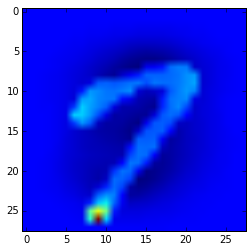

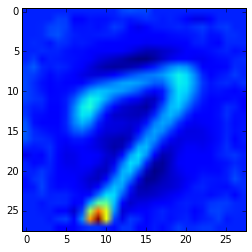

In [228]:
img = 15

# 784*32 + 32 + 32*784 + 784 = 50992
#print W.shape, b.shape, Wp.shape, bp.shape
#W,b,Wp,bp = map(lambda x: x.get_value(), model.params)

im = X[img].reshape((sqrt(X[1].shape),sqrt(X[1].shape)))
figure(), imshow(im)

#x = X[img]
#m = np.tanh(np.dot(x, W) + b)
#y = np.dot(m, Wp) + bp
y = model.predict((X[img:img+1]))

pred = y.reshape((sqrt(X[1].shape),sqrt(X[1].shape)))
figure(), imshow(pred)

print np.mean((im-pred)**2)

In [229]:
model.evaluate(X, X, verbose=2)
model.evaluate(Xt, Xt, verbose=2)
pass

0s - loss: 0.2207
0s - loss: 0.2063


In [ ]:
import pickle

pickle.dump(map(lambda x: x.get_value(), model.params), open("sample/sgdweights", "wb"))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(X)

In [ ]:
def do_pca(x):
    # pca.mean_ doesn't even matter
    Xt = np.dot(x, pca.components_.T)
    return np.dot(Xt, pca.components_)

Xll = map(do_pca, X)
print np.mean((Xll - X)**2)

In [ ]:
imshow(np.dot(pca.components_.T, pca.components_))